In [2]:
% load_ext rpy2.ipython

In [4]:
%%R
#ip <- installed.packages() 
#pkgs.to.remove <- ip[!(ip[,"Priority"] %in% c("base", "recommended")), 1]
#sapply(pkgs.to.remove, remove.packages)

NULL


In [3]:
%%R
#source("http://bioconductor.org/biocLite.R")
#biocLite("phyloseq")

NULL


In [3]:
%%R
library("phyloseq")
library(ggplot2)

In [5]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes, tree = "../../SeqData/trees/fulltree.tre")

In [6]:
%%R
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5452 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 5452 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5452 tips and 5450 internal nodes ]


In [7]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(physeq, function(x) x / sum(x))

In [12]:
%%R
# Computing the Bray d#istance matrix and NMDS in parallel

#ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
ord.full = ordinate(ps_snorm, method = "PCoA", distance = "unifrac", weighted=TRUE)
# Consider trymax= and k=3

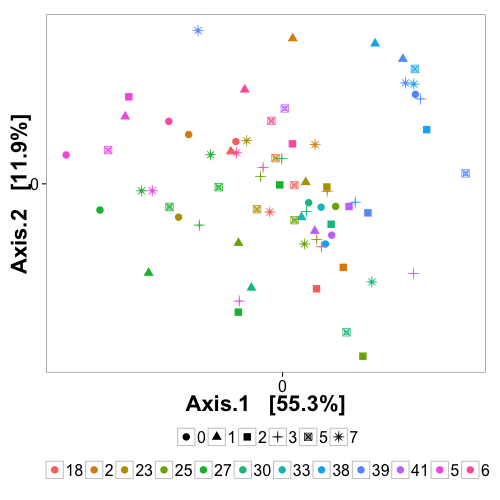

In [17]:
%%R -h 500 -w 500
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Day=as.factor(sample_data(ps_snorm)$Day)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
#p = plot_ordination(ps_snorm, D, color = "Day", shape = "Trtmt", axes=c(3,2))
p = plot_ordination(ps_snorm, D, color = "Cosm", shape = "Day")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 
#+ scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      legend.position = "bottom",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~Trtmt)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [87]:
%%R
ggsave(filename="NMDS-16S-3month.jpg", plot=p ,width=8.5, height=4)

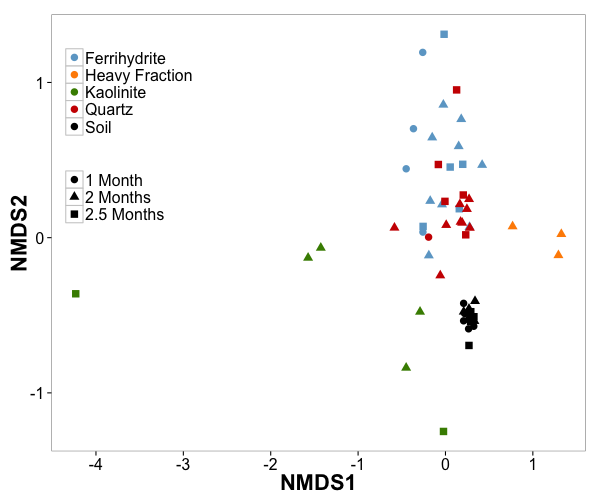

In [12]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Trtmt", shape = "MonthName", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0,1),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [13]:
%%R
ggsave(filename="NMDS-16S-AllMonths.Argonne.jpg", plot=p ,width=6, height=6)